In [1]:
#pip install prophet

In [2]:
#Import Libraries
import pandas as pd
from prophet import Prophet

# ATL-MIA

In [3]:
#Read data from MIA Route csv
MIA = pd.read_csv("ATL to MIA.csv")

In [4]:
#View Data
MIA

,ds,y
0,6/1/22,150.460000
1,7/1/22,149.970000
2,8/1/22,112.960000
3,9/1/22,100.433333
4,10/1/22,72.450000
5,11/1/22,70.685000
6,12/1/22,152.180000
7,1/1/23,61.755000
8,2/1/23,121.536667
9,3/1/23,50.860000


In [5]:
#Set a floor and Ceiling Price based on past data
MIA['cap'] = 300
MIA['floor'] = 50

In [6]:
#Instantiate "Prophet" object with Weekly and Daily Seasonality, and Logistic Method
m1 = Prophet(growth='logistic', daily_seasonality = True, weekly_seasonality = True)
#Call the "Fit" method with Historical Data
m1.fit(MIA)

18:19:50 - cmdstanpy - INFO - Chain [1] start processing
18:19:51 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
#Make future dates for predictions. Freq = m for monthly, as our histroical data is on a monthly basis
future1 = m1.make_future_dataframe(periods=24, freq = 'm')

In [8]:
#Predict yhat values based on future dates provided and store in fcst df
future1['cap'] = 300
future1['floor'] = 50
fcst1 = m1.predict(future1)

In [9]:
#Predict yhat values based on future dates provided and store in fcst df
fcst1 = m1.predict(future1)
#Return fcst df with date, predicted data & intervals
fcst1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
29,2024-10-31,108.051576,82.558146,134.534592
30,2024-11-30,53.006721,24.455368,78.878824
31,2024-12-31,56.127175,27.466800,84.183426
32,2025-01-31,106.110378,77.985248,133.281168
33,2025-02-28,106.109423,78.839859,132.453639


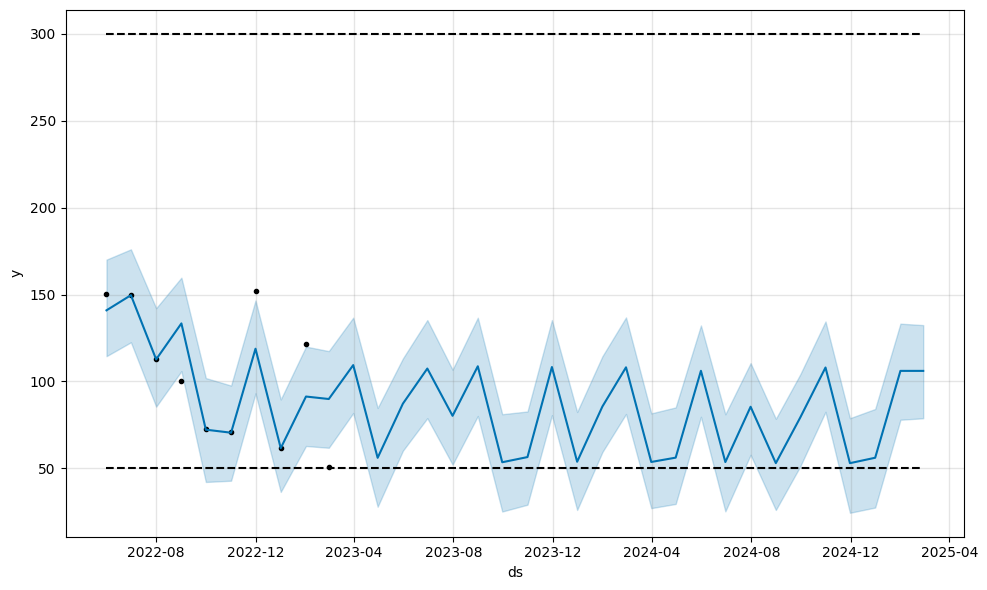

In [10]:
#Plot Forecast data
fig1 = m1.plot(fcst1)

# ATL-DEN

In [11]:
#Read data from DEN Route csv
DEN = pd.read_csv("ATL to DEN.csv")

In [12]:
#View Data
DEN

,ds,y
0,6/1/22,364.030
1,7/1/22,361.160
2,8/1/22,195.360
3,9/1/22,136.970
4,10/1/22,150.970
5,11/1/22,237.065
6,12/1/22,231.160
7,1/1/22,124.365
8,2/1/22,114.760
9,3/1/22,287.970


In [13]:
#Set a floor and Ceiling Price based on past data
DEN['cap'] = 425
DEN['floor'] = 100

In [14]:
#Instantiate "Prophet" object with Weekly and Daily Seasonality, and Logistic Method
m2 = Prophet(growth='logistic', daily_seasonality = True, weekly_seasonality = True)
#Call the "Fit" method with Historical Data
m2.fit(DEN)

18:19:53 - cmdstanpy - INFO - Chain [1] start processing
18:19:53 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
#Make future dates for predictions. Freq = m for monthly, as our histroical data is on a monthly basis
future2 = m2.make_future_dataframe(periods=24, freq = 'm')

In [16]:
#Predict yhat values based on future dates provided and store in fcst df
future2['cap'] = 425
future2['floor'] = 100
fcst2 = m2.predict(future2)

In [17]:
#Predict yhat values based on future dates provided and store in fcst df
fcst2 = m2.predict(future2)
#Return fcst df with date, predicted data & intervals
fcst2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,102.142648,38.528646,162.032769
1,2022-02-01,187.472225,124.178857,252.306729
2,2022-03-01,194.907836,135.365548,258.376270
3,2022-04-01,262.184809,200.653641,327.508747
4,2022-05-01,118.249084,54.409886,181.858428
5,2022-06-01,364.445902,306.631227,429.849118
6,2022-07-01,286.535662,224.271450,352.015897
7,2022-08-01,195.448861,132.951575,263.279242
8,2022-09-01,172.571619,110.345353,237.648218
9,2022-10-01,174.111617,112.847711,241.747982


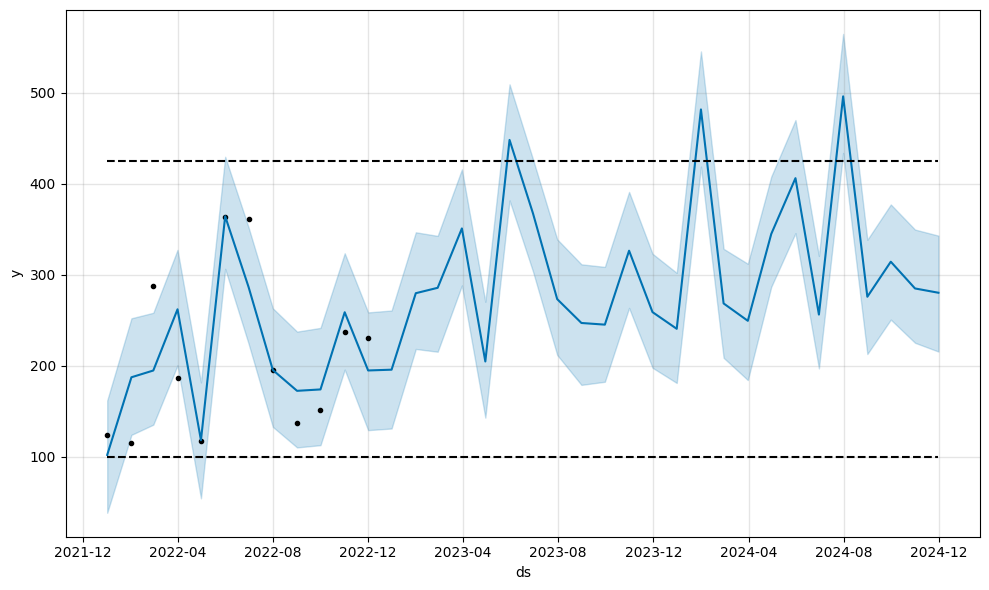

In [18]:
#Plot Forecast data
fig2 = m2.plot(fcst2)

# ATL-LAX

In [19]:
#Read data from DEN Route csv
LAX = pd.read_csv("ATL to LAX.csv")

In [20]:
#View Data
LAX

,ds,y
0,5/1/22,417.3000
1,6/1/22,220.7800
2,7/1/22,513.0700
3,8/1/22,299.1800
4,9/1/22,257.1600
5,10/1/22,154.1600
6,11/1/22,537.6600
7,12/1/22,441.0700
8,1/1/23,160.5875
9,2/1/23,140.1250


In [21]:
#Set a floor and Ceiling Price based on past data
LAX['cap'] = 525
LAX['floor'] = 125

In [22]:
#Instantiate "Prophet" object with Weekly and Daily Seasonality, and Logistic Method
m3 = Prophet(growth='logistic', daily_seasonality = True, weekly_seasonality = True)
#Call the "Fit" method with Historical Data
m3.fit(LAX)

18:19:56 - cmdstanpy - INFO - Chain [1] start processing
18:19:56 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
#Make future dates for predictions. Freq = m for monthly, as our histroical data is on a monthly basis
future3 = m3.make_future_dataframe(periods=24, freq = 'm')

In [24]:
#Predict yhat values based on future dates provided and store in fcst df
future3['cap'] = 425
future3['floor'] = 100
fcst3 = m3.predict(future3)

In [25]:
#Predict yhat values based on future dates provided and store in fcst df
fcst3 = m3.predict(future3)
#Return fcst df with date, predicted data & intervals
fcst3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-05-01,312.488968,245.873993,377.560423
1,2022-06-01,221.993972,157.041817,288.852731
2,2022-07-01,477.527831,413.398973,549.291989
3,2022-08-01,268.524133,205.223179,333.811980
4,2022-09-01,328.333649,263.879364,397.935135
5,2022-10-01,146.746897,78.741855,213.742374
6,2022-11-01,511.980768,447.847802,575.148023
7,2022-12-01,316.714568,251.534450,380.232080
8,2023-01-01,186.460082,121.912773,258.507318
9,2023-02-01,142.685865,76.109530,211.742082


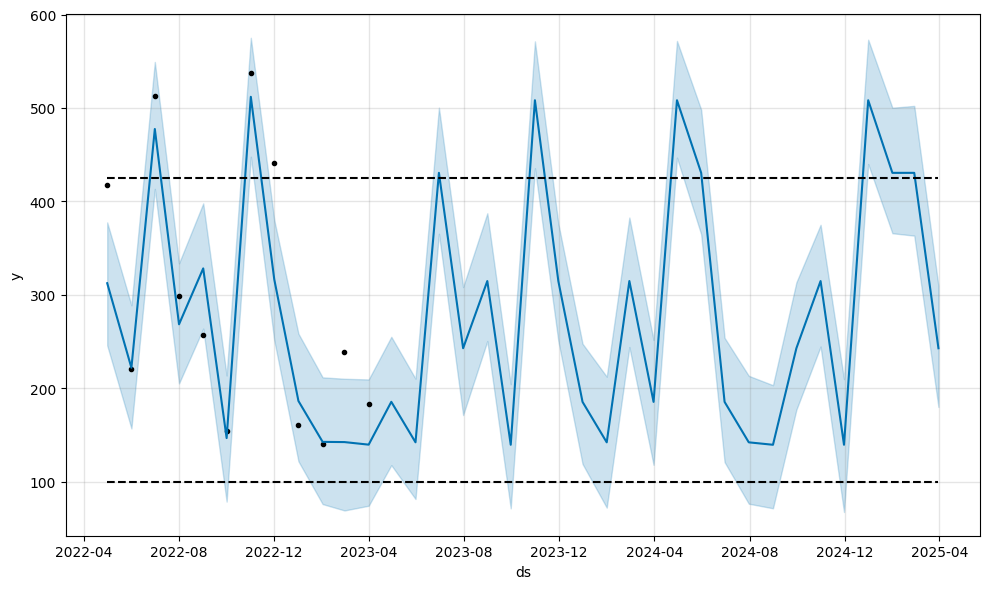

In [26]:
#Plot Forecast data
fig3 = m3.plot(fcst3)

# Combine DFs

In [27]:
#Create a destination field for identification
fcst1['destination'] = 'MIA'
fcst2['destination'] = 'DEN'
fcst3['destination'] = 'LAX'

In [28]:
flight_pred = pd.concat([fcst1, fcst2, fcst3])

In [29]:
flight_pred.to_csv('Flight Forecast.csv', index=False)